In [1]:
!pip install -q qiskit
!pip install -q qiskit-aer
!pip install -q pylatexenc

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#2-spin
t = 1

#creating a random initial quantum state
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.cx(0, 1)

#applying time evolution
qc2.rxx(2 * t, 0, 1)
qc2.ryy(2 * t, 0, 1)
qc2.rzz(2 * t, 0, 1)

qc2.measure_all()

simulator = AerSimulator()
result = simulator.run(qc2).result()
output = result.get_counts()
print("Output: ", output)

Output:  {'11': 504, '00': 520}


In [4]:
#3-spin
qc3 = QuantumCircuit(3)
qc3.x(0)
qc3.cx(1,2)

stepper = t / 5
#applying partwise to both pairs, because that is how the Hamiltonian is defined
for i, j in [(0, 1), (1, 2)]:
    qc3.rxx(2 * stepper, i, j)
    qc3.ryy(2* stepper, i, j)
    qc3.rzz(2* stepper, i, j)

qc3.measure_all()
result = simulator.run(qc3).result()
output = result.get_counts()
print("Output: ", output)

Output:  {'010': 124, '001': 867, '100': 33}


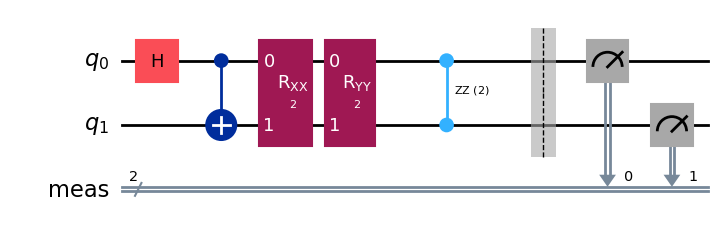

In [5]:
qc2.draw(output = 'mpl')

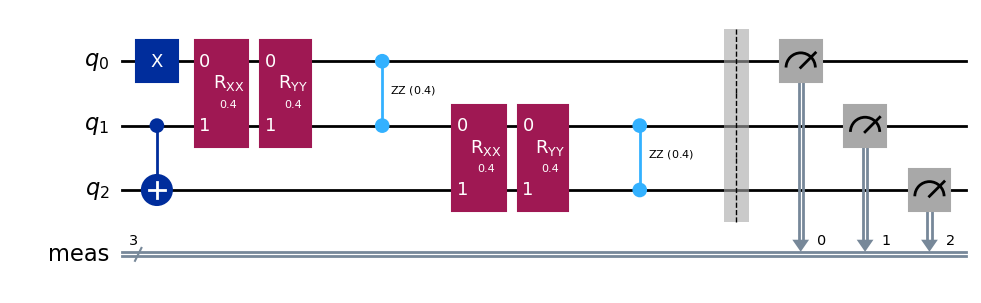

In [6]:
qc3.draw(output= 'mpl')

# Theory

The Heisenberg model describes quantum spin systems where each spin interacts with its neighbors. The Hamiltonian for the same is:

𝐻
=
𝐽
∑
⟨
𝑖
,
𝑗
⟩
(
𝑋
𝑖
𝑋
𝑗
+
𝑌
𝑖
𝑌
𝑗
+
𝑍
𝑖
𝑍
𝑗
), when we consider the coupling strength to be 1.


Also, the time evolution is described by ∣ψ(t)⟩=e
−iHt
 ∣ψ(0)⟩. Now, in order to represent the same, we use the rotation gates, where the rkk gates, where k belongs to the set {x,y,z} can be generalized as e
−iθK⊗K/2. Therefore, we see that in order to implement the time evolution, we algebraically multiply and apply these gates to our circuit, which can be seen in the code blocks above.

The main differences between them are that in the two-spin state, the hamiltonian is restricted to the interaction between those two spins, however, in the three-spin state, we have pairwise interaction between the (0,1) and then (1,2) qubits. Moreover, in the two-spin state, the output is limited to 4 possibilities, which increase to 8 in the 3-spin state, thus increasing the complexity.